# Exercises


### Evaluating Regression

In [1]:
from wrangle import wrangle_zillow
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression#import r2_score from sklearn

from sklearn.metrics import r2_score

#### Getting zillow data

In [3]:
train, validate, test = wrangle_zillow()

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [15]:
train.head()


,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
898710,5.0,3.0,3349.0,208996.0,1964.0,2815.98,6037.0
951392,4.0,3.0,1985.0,259657.0,1977.0,3743.23,6037.0
1847439,3.0,1.0,1616.0,28940.0,1920.0,829.60,6037.0
706503,4.0,2.5,2028.0,87633.0,1972.0,1321.00,6111.0
461225,2.0,2.0,1138.0,46382.0,1958.0,583.19,6037.0


In [4]:
df = train.copy()
df = df.drop(columns= ['bedrooms', 'bathrooms', 'year_built', 'taxamount', 'fips'])


In [5]:
df

,area,tax_value
898710,3349.0,208996.0
951392,1985.0,259657.0
1847439,1616.0,28940.0
706503,2028.0,87633.0
461225,1138.0,46382.0
...,...,...
1025016,1434.0,62992.0
1734384,1336.0,540464.0
1121629,1739.0,513043.0
533946,1707.0,157328.0


In [6]:
X = df[['area']]
y = df['tax_value']

In [7]:
baseline = round(train.tax_value.mean(), 2)
baseline


341819.93

In [8]:
df['baseline'] = baseline

In [97]:
df

,area,tax_value,baseline
898710,3349.0,208996.0,341819.93
951392,1985.0,259657.0,341819.93
1847439,1616.0,28940.0,341819.93
706503,2028.0,87633.0,341819.93
461225,1138.0,46382.0,341819.93
...,...,...,...
1025016,1434.0,62992.0,341819.93
1734384,1336.0,540464.0,341819.93
1121629,1739.0,513043.0,341819.93
533946,1707.0,157328.0,341819.93


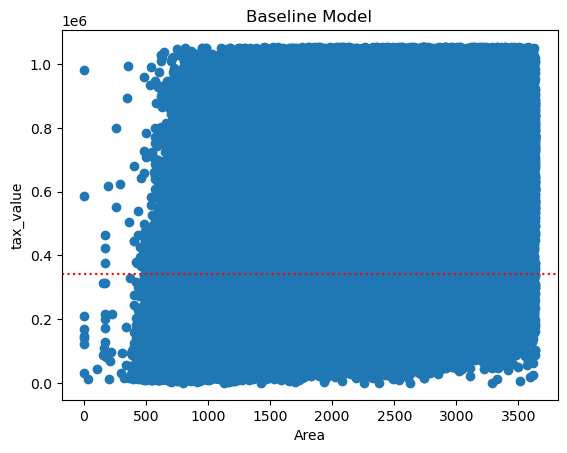

In [98]:
# plot data with baseline:

plt.scatter(X, y)
plt.axhline(yhat_baseline, ls=":", color='r')

plt.xlabel("Area")
plt.ylabel("tax_value")
plt.title("Baseline Model")
plt.show()

In [9]:

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

df['predictions'] = predictions

residuals = y - predictions
residuals

baseline_residuals = y - baseline
baseline_residuals
df['baseline_residuals'] = baseline_residuals
df['residuals'] = residuals
df

,area,tax_value,baseline,predictions,baseline_residuals,residuals
898710,3349.0,208996.0,341819.93,616770.136823,-132823.93,-407774.136823
951392,1985.0,259657.0,341819.93,391917.653737,-82162.93,-132260.653737
1847439,1616.0,28940.0,341819.93,331088.792844,-312879.93,-302148.792844
706503,2028.0,87633.0,341819.93,399006.111782,-254186.93,-311373.111782
461225,1138.0,46382.0,341819.93,252291.515047,-295437.93,-205909.515047
...,...,...,...,...,...,...
1025016,1434.0,62992.0,341819.93,301086.482051,-278827.93,-238094.482051
1734384,1336.0,540464.0,341819.93,284931.391624,198644.07,255532.608376
1121629,1739.0,513043.0,341819.93,351365.079808,171223.07,161677.920192
533946,1707.0,157328.0,341819.93,346089.948240,-184491.93,-188761.948240


In [41]:
predictions

array([616770.1368227 , 391917.65373715, 331088.79284377, ...,
       351365.07980823, 346089.94824024, 380213.45557067])

#### Plot the residuals for the linear regression model that you made.

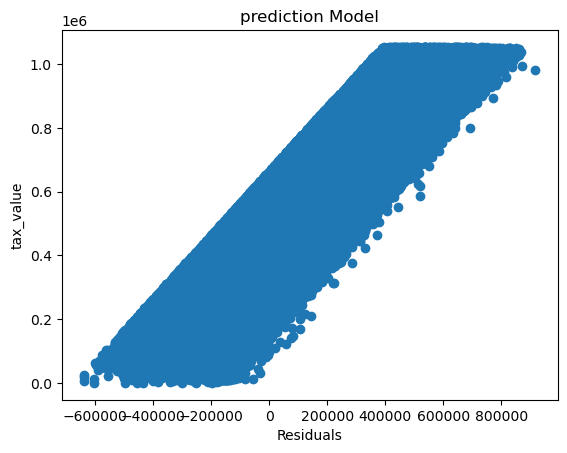

In [56]:
# plot data with baseline:

plt.scatter(residuals, y)


plt.xlabel('Residuals')
plt.ylabel("tax_value")
plt.title("prediction Model")
plt.show()

#### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [12]:
df['baseline_residual_2'] = df.baseline_residuals**2
df['residual_2']= df.residuals**2



In [13]:
#add the residuals together
SSE_baseline = df.baseline_residual_2.sum()
SSE = df.residual_2.sum()

In [14]:
print(f"SSE Baseline = {SSE_baseline: .1f}")
print(f"SSE = {SSE:.1f}")

SSE Baseline =  49619292856699264.0
SSE = 39420837365639056.0


In [15]:
# calcaluate MSE

MSE_baseline = SSE_baseline/len(df)
MSE = SSE/len(df)

print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 46444617473.9
MSE = 36898665953.1


In [16]:
# Calculate RMSE = (MSE)^(1/2)

RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5

print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))


RMSE baseline =  215510.1
RMSE =  192090.3


In [17]:
# Total Sum of Squares = SSE for baseline

TSS = SSE_baseline
TSS

4.961929285669926e+16

In [18]:
# ESS - Explained Sum of Squares ('Explained Error')

ESS = TSS - SSE
ESS

1.0198455491060208e+16

In [19]:
# Calculate R^2 
R2 = ESS/TSS
R2

0.20553407563693807

In [20]:
df

,area,tax_value,baseline,predictions,baseline_residuals,residuals,baseline_residual_2,residual_2
898710,3349.0,208996.0,341819.93,616770.136823,-132823.93,-407774.136823,1.764220e+10,1.662797e+11
951392,1985.0,259657.0,341819.93,391917.653737,-82162.93,-132260.653737,6.750747e+09,1.749288e+10
1847439,1616.0,28940.0,341819.93,331088.792844,-312879.93,-302148.792844,9.789385e+10,9.129389e+10
706503,2028.0,87633.0,341819.93,399006.111782,-254186.93,-311373.111782,6.461100e+10,9.695321e+10
461225,1138.0,46382.0,341819.93,252291.515047,-295437.93,-205909.515047,8.728357e+10,4.239873e+10
...,...,...,...,...,...,...,...,...
1025016,1434.0,62992.0,341819.93,301086.482051,-278827.93,-238094.482051,7.774501e+10,5.668898e+10
1734384,1336.0,540464.0,341819.93,284931.391624,198644.07,255532.608376,3.945947e+10,6.529691e+10
1121629,1739.0,513043.0,341819.93,351365.079808,171223.07,161677.920192,2.931734e+10,2.613975e+10
533946,1707.0,157328.0,341819.93,346089.948240,-184491.93,-188761.948240,3.403727e+10,3.563107e+10


In [21]:
r2_score(y, df.predictions)

0.2055340756369376

In [43]:
def regression_errors(y, yhat):
    residuals = y - yhat
    baseline = round(y.mean(), 2)
    baseline_residuals = y - baseline
    values = {
        'SSE' : (residuals**2).sum(),
        'TSS' : (baseline_residuals**2).sum(),
        'ESS' : TSS - SSE,
        'MSE' : SSE/len(y),
        'RMSE' : MSE**.5   
        }
    return values

In [44]:
regression_errors(y, predictions)

{'SSE': 3.942083736563906e+16,
 'TSS': 4.961929285669926e+16,
 'ESS': 1.0198455491060208e+16,
 'MSE': 36898665953.082085,
 'RMSE': 192090.25470617213}

In [41]:
def baseline_mean_errors(y):
    baseline = round(y.mean(), 2)
    residuals = y - baseline
    values = {
        'SSE' : (residuals**2).sum(),
        'MSE' : SSE/len(y),
        'RMSE' : MSE**.5   
        }
    return values

In [45]:
baseline_mean_errors(y)

{'SSE': 4.961929285669926e+16,
 'MSE': 36898665953.082085,
 'RMSE': 192090.25470617213}

In [82]:
def better_than_baseline(y, yhat):
    model_score = r2_score(y, yhat)
    baseline = round(y.mean(), 2)
    baseline_arr = np.full(y.shape , baseline)
    baseline_score = r2_score(y, baseline_arr)
    if model_score > baseline_score:
        return True
    else: 
        return False
    

In [83]:
better_than_baseline(y, predictions)

True

In [59]:
x = np.full(y.shape, baseline)
len(x) == len(y)
len(predictions) == len(y)

True

In [77]:
baseline =  round(y.mean(), 2)
baseline_arr = np.full(y.shape , baseline)
base_df = pd.DataFrame(baseline_arr)
baseline_score = r2_score(y, baseline_arr)


-6.661338147750939e-16

In [64]:
type(y)

pandas.core.series.Series